#### **Why use CNN? Why not use linear layers?**

`.` Number of parameters in linear layers -

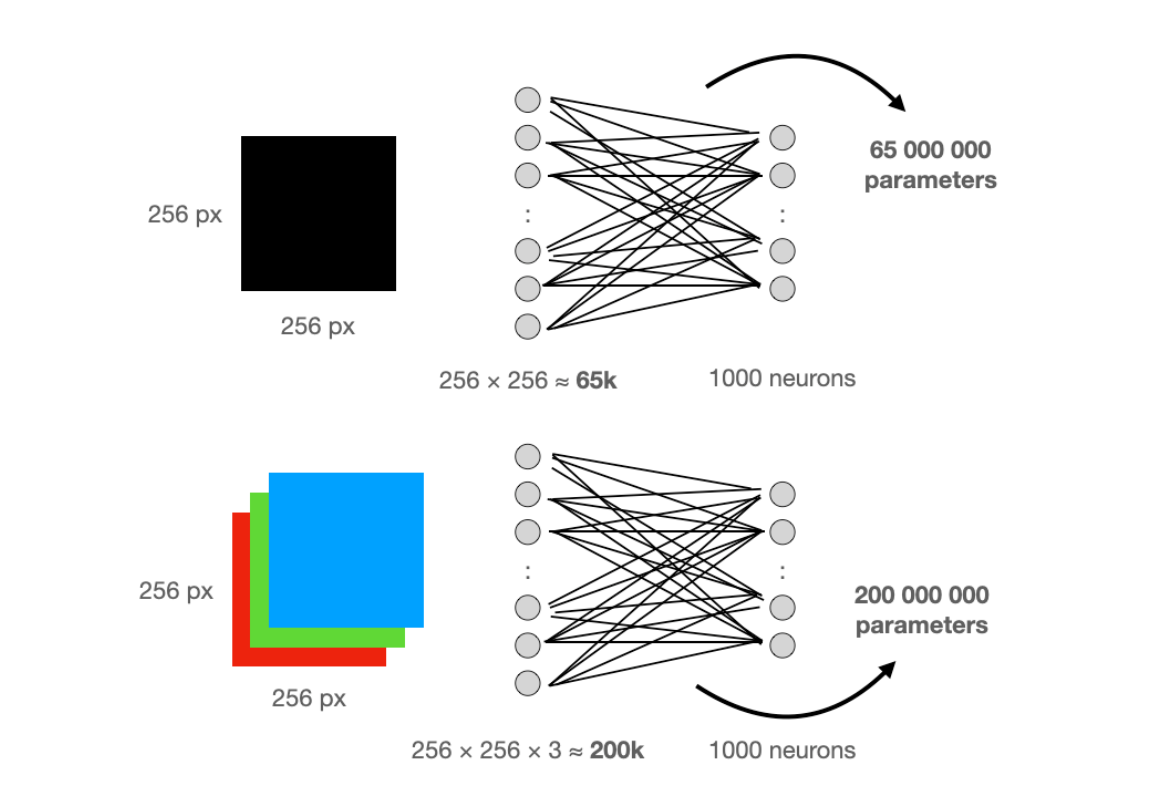

`.` Additionally, 

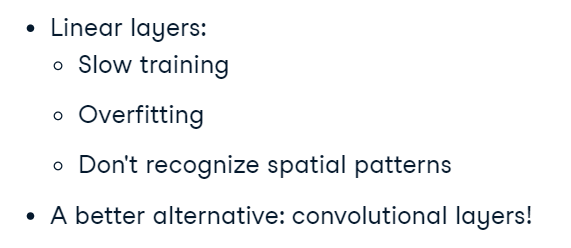

Therefore, we use convolution layers. Let us take a look at a convolution function.

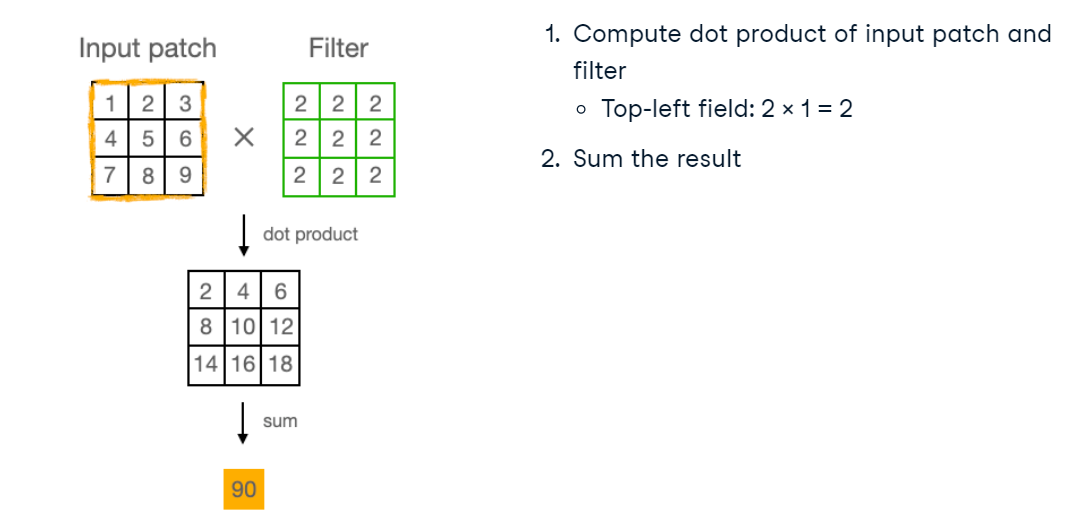

The function is used at convolutional layers to convolve the input data

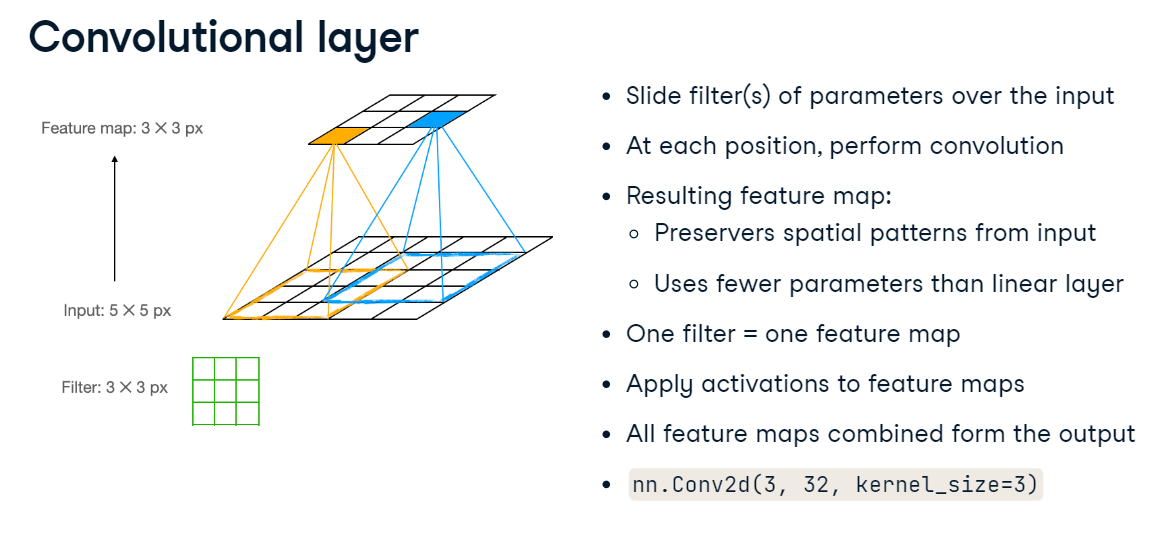

In PyTorch, we use `nn.Conv2d()` to define a convolutional layer.

We can use padding to images to ensure the corners of an image are correctly processed during the convolution function.

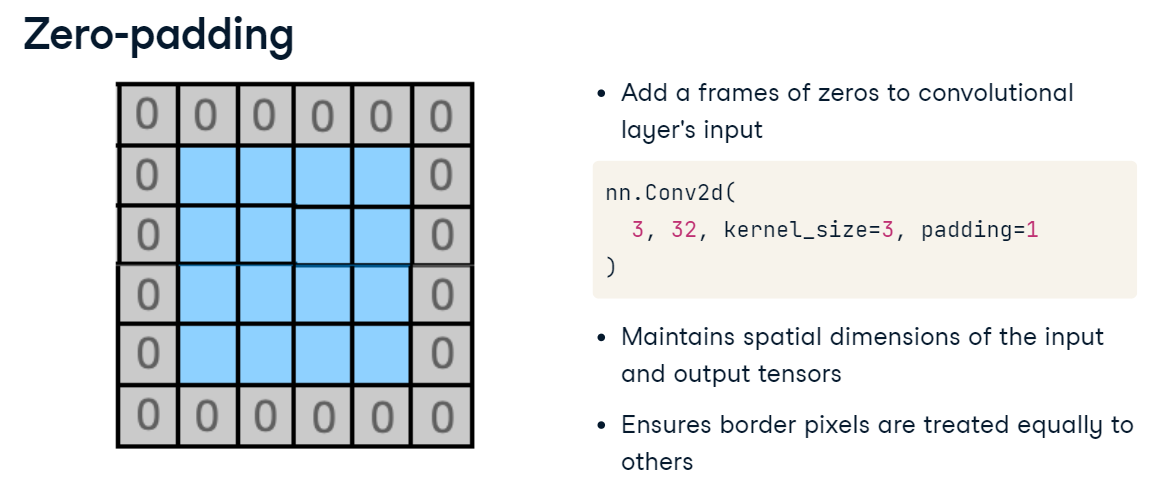

We also use pooling to perform dimentionality reduction. one of the pooling functions is **Max Pooling**. let us take a look at it -

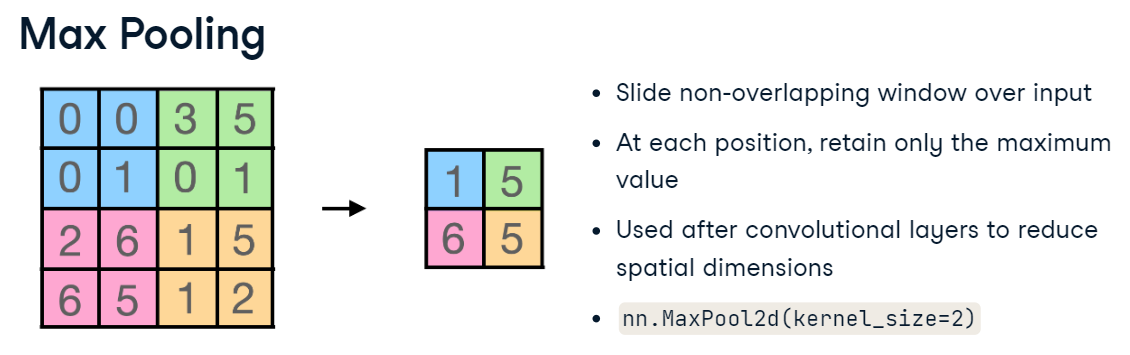

#### Building a CNN

In [ ]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU()
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU()
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten()
        )
        
        self.classifier = nn.Linear(64*16*16, num_classes)
    
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

#### Image Classifier trianing loop

In [ ]:
net = Net(num_classes=7)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs  = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

#### Averaging multi-class evaluation metrics

In [ ]:
from torchmetrics import Recall

recall_per_class = Recall(task='multiclass', num_classes=7, average=None)
recall_micro = Recall(task='multiclass', num_classes=7, average='micro')
recall_macro = Recall(task='multiclass', num_classes=7, average='macro')
recall_weighted = Recall(task='multiclass', num_classes=7, average='weighted')

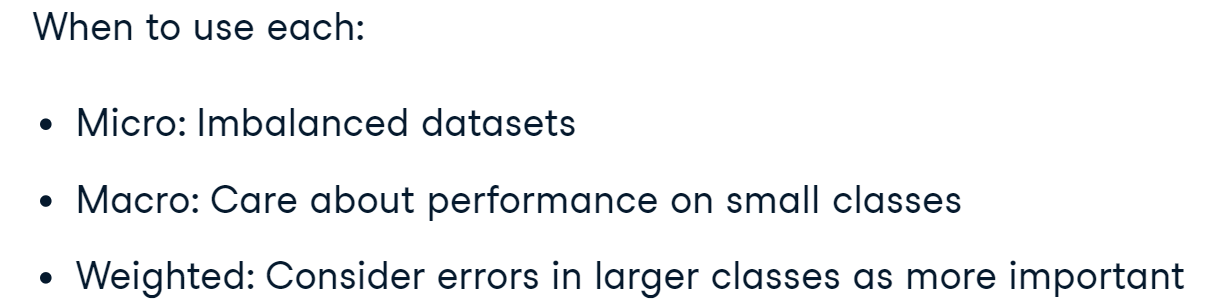

#### **Evaluation Loop**

In [ ]:
from torch import torch
from torchmetrics import Precision, Recall

metric_precision = Precision(task='multiclass', num_classes=7, average='macro')
metric_recall = Recall(task='multiclass', num_clasees=7, average='macro')

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()

print(f'Precision: {precision}')
print(f'Recall: {recall}')

#### Analyzing performance per class

In [ ]:
metric_recall = Recall(task = 'multiclass', num_classes=7, average=None)

net.eval()
with torch.no_grad():
    for images, labels in dataloaer_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_recall(preds, labels)
recall = metric_recall.compute()

# print(recall)
# dataset_test.class_to_idx

# OR

per_class_recall = {k: recall[v].item() for k,v in dataset_test.class_to_idx.items()}